# Assignment 1

### Importing Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('PSID.csv').drop(['Seq No', 'intnum', 'persnum'], axis=1)
data.describe()

,age,educatn,earnings,hours,kids
count,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,5.595116,18.449502,15985.447449,947.175837,14.887856
min,30.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,12.000000,85.000000,32.000000,1.000000
50%,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,50.000000,99.000000,240000.000000,5160.000000,99.000000


### Visualization

#### Age

Text(0.5, 0, 'Age')

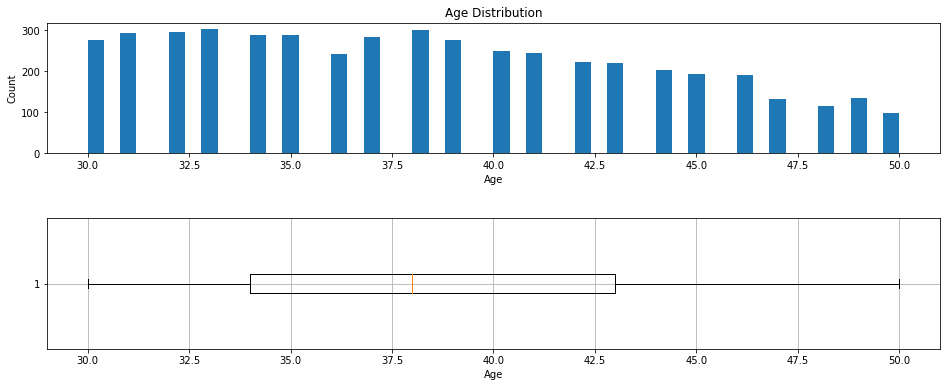

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 6))
plt.subplots_adjust(hspace=0.5)

ax[0].hist(data['age'], bins=50)
ax[0].set_title("Age Distribution")
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')

ax[1].boxplot(data['age'], vert=False)
ax[1].grid(True)
ax[1].set_xlabel('Age')

#### Education

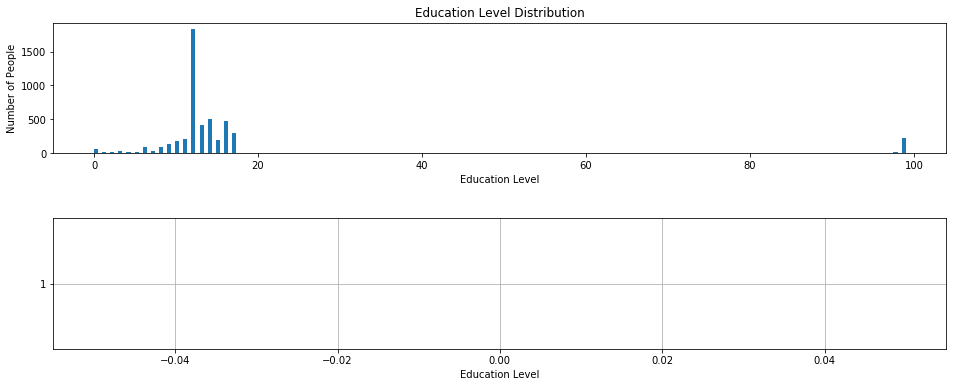

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 6))
plt.subplots_adjust(hspace=0.5)

ax[0].hist(data['educatn'], bins=200)
ax[0].set_title("Education Level Distribution")
ax[0].set_xlabel('Education Level')
ax[0].set_ylabel('Number of People')

ax[1].boxplot(data['educatn'], vert=False)
ax[1].set_xlabel('Education Level')
ax[1].grid(True)

#### Earnings

Text(0.5, 0, 'Earnings')

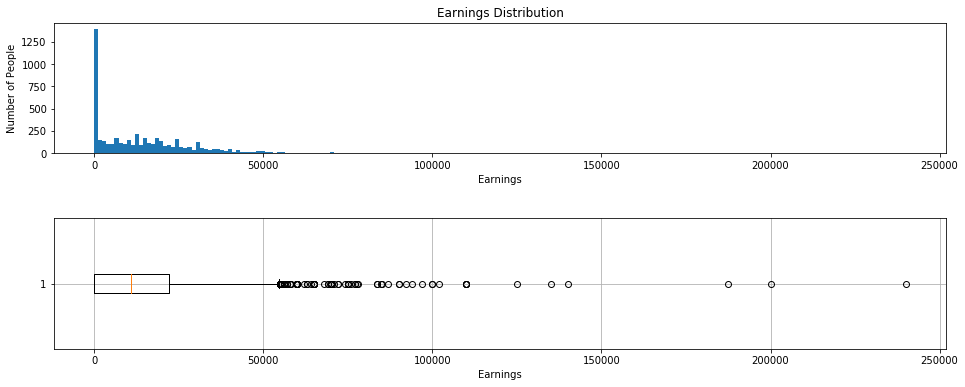

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 6))
plt.subplots_adjust(hspace=0.5)

ax[0].hist(data['earnings'], bins=200)
ax[0].set_title("Earnings Distribution")
ax[0].set_xlabel('Earnings')
ax[0].set_ylabel('Number of People')

ax[1].boxplot(data['earnings'], vert=False)
ax[1].grid(True)
ax[1].set_xlabel('Earnings')

#### Number of Kids

Text(0.5, 0, 'Number of Kids')

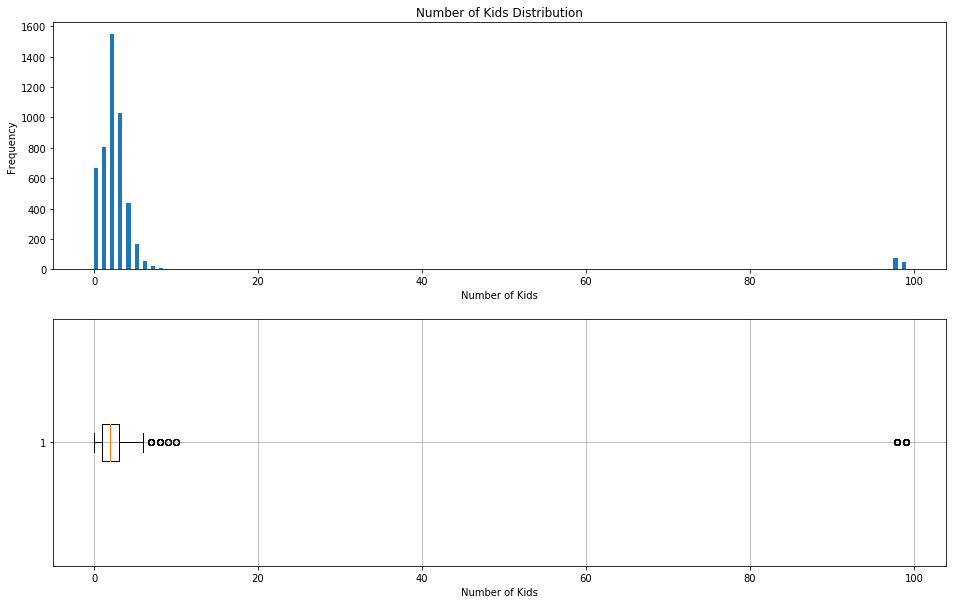

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

ax[0].hist(data['kids'], bins=200)
ax[0].set_title("Number of Kids Distribution")
ax[0].set_xlabel('Number of Kids')
ax[0].set_ylabel('Frequency')

ax[1].boxplot(data['kids'], vert=False)
ax[1].grid(True)
ax[1].set_xlabel('Number of Kids')

#### Martial status

Text(0, 0.5, 'Count')

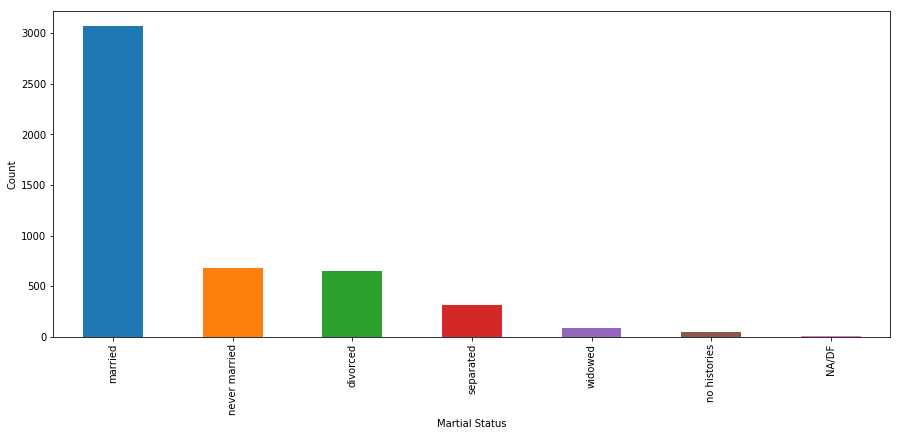

In [10]:
married = data['married'].value_counts()
married.plot(kind='bar',figsize=(15,6))
plt.xlabel('Martial Status')
plt.ylabel('Count')

### Removing Outliers

In the previous section, we identified that there are outliers after earnings exceed 55000. So we filter out those records as below

Text(0.5, 0, 'Earnings')

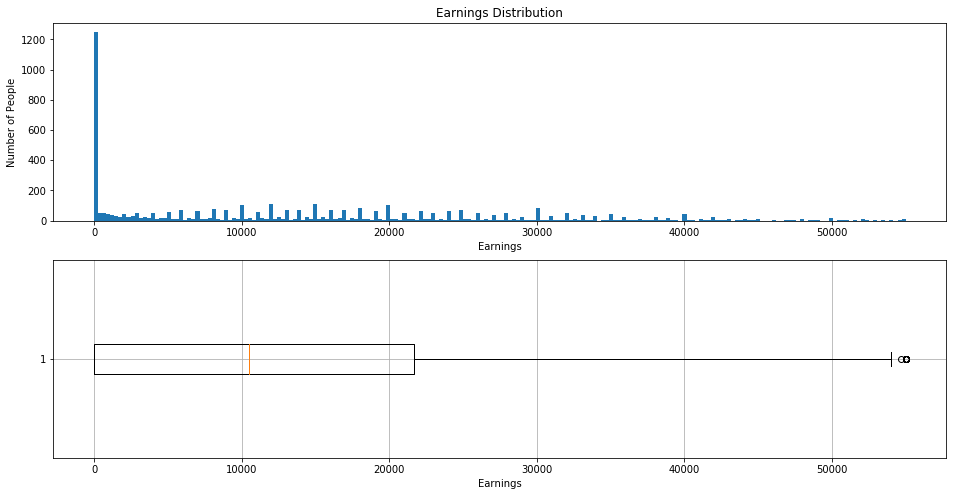

In [11]:
extracted_data = data.drop(data[data.earnings > 55000].index)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

ax[0].hist(extracted_data['earnings'], bins=200)
ax[0].set_title("Earnings Distribution")
ax[0].set_xlabel('Earnings')
ax[0].set_ylabel('Number of People')

ax[1].boxplot(extracted_data['earnings'], vert=False)
ax[1].grid(True)
ax[1].set_xlabel('Earnings')

In the previous section, we identified that there are outliers after number of kids are above 6. So we filter out those records as below

Text(0.5, 0, 'Number of Kids')

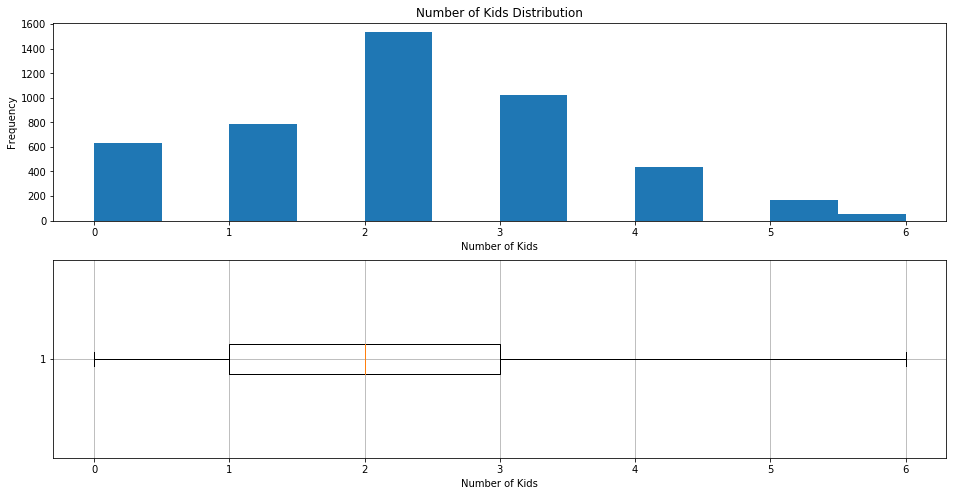

In [12]:
extracted_data = extracted_data.drop(extracted_data[extracted_data.kids > 6].index)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

ax[0].hist(extracted_data['kids'], bins=12)
ax[0].set_title("Number of Kids Distribution")
ax[0].set_xlabel('Number of Kids')
ax[0].set_ylabel('Frequency')

ax[1].boxplot(extracted_data['kids'], vert=False)
ax[1].grid(True)
ax[1].set_xlabel('Number of Kids')

In the previous section, we identified that there are outliers after eduction level is above 20. So we filter out those records as below

Text(0.5, 0, 'Education level')

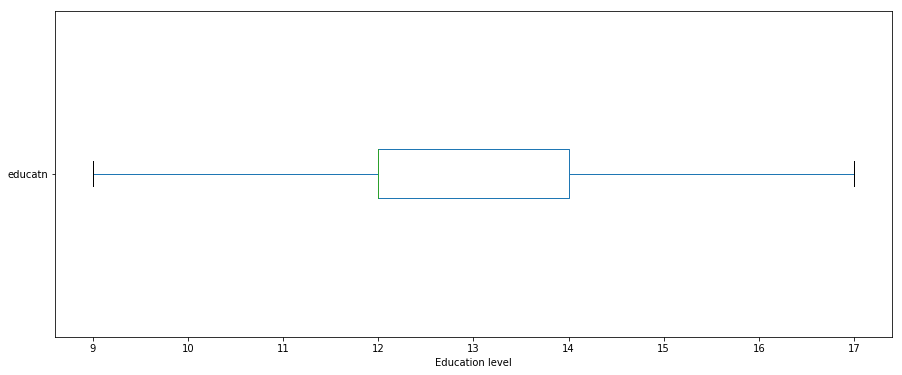

In [13]:
extracted_data = extracted_data.drop(extracted_data[extracted_data.educatn > 20].index)
extracted_data = extracted_data.drop(extracted_data[extracted_data.educatn < 9].index)

# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

# ax[0].hist(extracted_data['educatn'], bins=12)
# ax[0].set_title("Number of Kids Distribution")
# ax[0].set_xlabel('Number of Kids')
# ax[0].set_ylabel('Frequency')

# ax[1].boxplot(extracted_data['educatn'], vert=False)
# ax[1].grid(True)
# ax[1].set_xlabel('Number of Kids')

extracted_data.boxplot(column=['educatn'], grid=False, return_type=None, vert=False, figsize=(15,6))
plt.xlabel('Education level')

### Observations on relations

Text(0, 0.5, 'Hours')

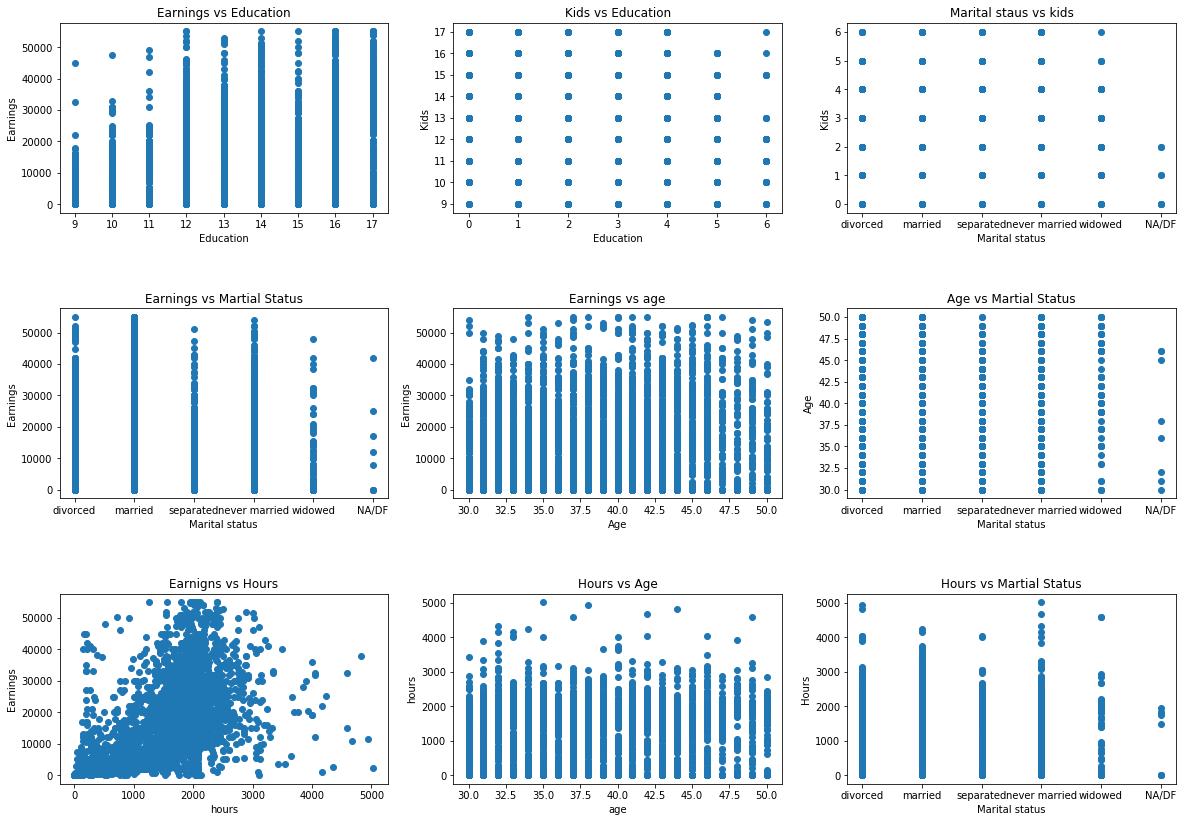

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(20, 14))
plt.subplots_adjust(hspace=0.5)

ax[0, 0].scatter(extracted_data['educatn'], extracted_data['earnings'])
ax[0, 0].set_title('Earnings vs Education')
ax[0, 0].set_xlabel("Education")
ax[0, 0].set_ylabel("Earnings")

ax[0, 1].scatter(extracted_data['kids'], extracted_data['educatn'])
ax[0, 1].set_title('Kids vs Education')
ax[0, 1].set_xlabel("Education")
ax[0, 1].set_ylabel("Kids")

ax[0, 2].scatter(extracted_data['married'], extracted_data['kids'])
ax[0, 2].set_title('Marital staus vs kids')
ax[0, 2].set_xlabel("Marital status")
ax[0, 2].set_ylabel("Kids")


ax[1, 0].scatter(extracted_data['married'], extracted_data['earnings'])
ax[1, 0].set_title('Earnings vs Martial Status')
ax[1, 0].set_xlabel("Marital status")
ax[1, 0].set_ylabel("Earnings")

ax[1, 1].scatter(extracted_data['age'], extracted_data['earnings'])
ax[1, 1].set_title('Earnings vs age')
ax[1, 1].set_xlabel("Age")
ax[1, 1].set_ylabel("Earnings")

ax[1, 2].scatter(extracted_data['married'], extracted_data['age'])
ax[1, 2].set_title('Age vs Martial Status')
ax[1, 2].set_xlabel("Marital status")
ax[1, 2].set_ylabel("Age")


ax[2, 0].scatter(extracted_data['hours'], extracted_data['earnings'])
ax[2, 0].set_title('Earnigns vs Hours')
ax[2, 0].set_xlabel("hours")
ax[2, 0].set_ylabel("Earnings")

ax[2, 1].scatter(extracted_data['age'], extracted_data['hours'])
ax[2, 1].set_title('Hours vs Age')
ax[2, 1].set_xlabel("age")
ax[2, 1].set_ylabel("hours")

ax[2, 2].scatter(extracted_data['married'], extracted_data['hours'])
ax[2, 2].set_title('Hours vs Martial Status')
ax[2, 2].set_xlabel("Marital status")
ax[2, 2].set_ylabel("Hours")

#### Spearman correlation coefficiant 

In [15]:
extracted_data.corr(method="spearman")

,age,educatn,earnings,hours,kids
age,1.000000,0.011966,0.119079,0.072843,0.132457
educatn,0.011966,1.000000,0.324357,0.110111,-0.225094
earnings,0.119079,0.324357,1.000000,0.759218,-0.217805
hours,0.072843,0.110111,0.759218,1.000000,-0.155404
kids,0.132457,-0.225094,-0.217805,-0.155404,1.000000


#### Observations:

1. Earnings and working hours has a strong positive correlation. i.e when a person works for longer period, he/she will get higher earnings



### Hypothesis Testing

#### 1. Does income affect the number of kids in a family 

µ  - Average income for families (General Mean)
µl - Average income for families having 2 or less than 2 kids (Sample Mean)


Ho : µl = µ  Null hypothesis  (Average income of families with kids having 2 or below 2 is equal to average general income of families)
H1 : µ1 ≠ µ  Alternative hypothesis

In [13]:
data = pd.DataFrame(extracted_data)

l_kids = data.loc[data['kids'] <= 2]
µl = l_kids['earnings'].mean()      
avg_income = data['earnings'].mean()
std_income = data['earnings'].std()

Z = (µl-avg_income)/(std_income)
z_critical = 1.96 # alpha level of 0.05 and two-tailed test

print(µl)
print(avg_income)
print(std_income)
print(Z)

16011.995540691192
14260.09577327144
13228.02562359373
0.13243849212803419


µl = 16011.995540691192
avg_income = 14260.09577327144
std_income = 13228.02562359373
Z = 0.1324384921280341

As 0.1324 < 1.96 we can't reject null hypothesis with 95% significant level 

#### 2. Will income increase with the age 

µ  - Average income 
µl - Average income for people with age above 35 

Ho : µl = µ  Null hypothesis  (Average income with person above age 35 is equal to average income of general population) 
H1 : µ1 ≠ µ  Alternative hypothesis

In [15]:
data = pd.DataFrame(extracted_data)

o_data = data.loc[data['age'] > 35]
µo = o_data['earnings'].mean()      
avg_income = data['earnings'].mean()
std_income = data['earnings'].std()

Z = (µo-avg_income)/(std_income)
z_critical = 1.96 # alpha level of 0.05 and two-tailed test

print(µo)
print(avg_income)
print(std_income)
print(Z)

15487.722415795586
14260.09577327144
13228.02562359373
0.0928049791750124


µo = 15487.722415795586
avg_income = 14260.09577327144
std_income = 13228.02562359373
Z = 0.0928049791750124

As 0.0928 < 1.96 we can't reject null hypothesis with 95% significant level